# Muhammad Rifqi Febrian (mrf2174)
# HW 2 Part 2

In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
from scipy.stats import pearsonr
import scipy.stats
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part 2: Classification on red and white wine characteristics

First, import the red and the white wine csv files into separate pandas dataframes from the following website

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

In [3]:
#read red wine csv file
df_1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

#checking the dataset
df_1.head()

print(np.shape(df_1))
display(df_1)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#read white wine csv file
df_0=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

#checking the dataset
df_0.head()

print(np.shape(df_0))
display(df_0)

(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

The target data (i.e. the dependent variable) is "winetype".

In [6]:
# adding a "winetype" column to dataset of red wine
df_1["winetype"]=1
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
# adding a "winetype" column to dataset of white wine
df_0["winetype"]=0
df_0.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
# combining both datasets into a single dataframe
df_0_1 = [df_0, df_1]
wine_data = pd.concat(df_0_1)

print(np.shape(wine_data))

display(wine_data)

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


## 2.1 
Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

The target data (i.e. the dependent variable) is "winetype".

In [10]:
# Univariate distribution of the target feature (wine type)
# Target feature

row_1 = len(df_1.index)
print(row_1)

row_0 = len(df_0.index)
print(row_0)

1599
4898


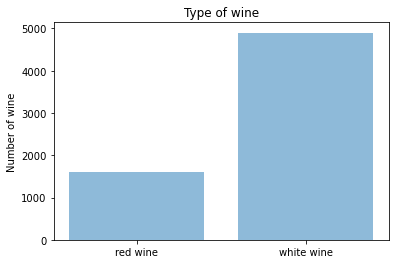

In [11]:
#import matplotlib.pyplot as plt; plt.rcdefaults()
#import numpy as np
#import matplotlib.pyplot as plt

x_variable = ('red wine', 'white wine')
y_pos = np.arange(len(x_variable))
#print(y_pos)
y_variable = [row_1, row_0]

plt.bar(y_pos, y_variable, align='center', alpha=0.5)
plt.xticks(y_pos, x_variable)
plt.ylabel('Number of wine')
plt.title('Type of wine')

plt.show()

Text(0.5, 0, 'Citric acid')

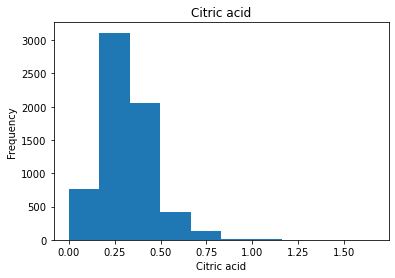

In [12]:
# First explanatory variable
# I chooses citric acid as my first explanatory variable
wine_data['citric acid'].plot.hist()
plt.title("Citric acid")
plt.xlabel("Citric acid")

Text(0.5, 0, 'Residual sugar')

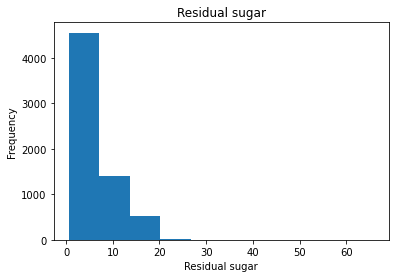

In [13]:
# Second explanatory variable
# I chooses residual sugar as my second explanatory variable
wine_data['residual sugar'].plot.hist()
plt.title("Residual sugar")
plt.xlabel("Residual sugar")

Text(0.5, 0, 'total sulfur dioxide')

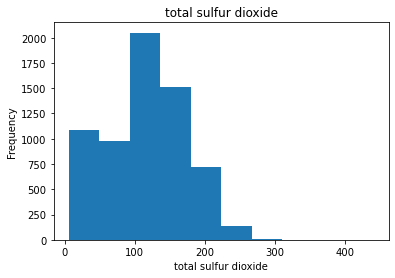

In [14]:
# Third explanatory variable
# I chooses total sulfur dioxide as my third explanatory variable
wine_data['total sulfur dioxide'].plot.hist()
plt.title("total sulfur dioxide")
plt.xlabel("total sulfur dioxide")

## 2.2 
### 2.2 A
Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable.

In [16]:
# Changing variables name to X, y to create train/test split

y = wine_data['winetype']
X = wine_data.loc[:, wine_data.columns != "winetype"]

display(X)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
# Split data in training and test set
from sklearn.model_selection import train_test_split

# Use train_test_split(X,y) to create four new data sets, defaults to .75/.25 split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X.shape)
X_train.shape

(6497, 12)


(4872, 12)

### 2.2 B
Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? 

### Logistic Regression

In [19]:
# Logistic Regression using cross-validation
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1, penalty='none', max_iter=6000).fit(X_train, y_train)

print("logreg .coef_: {}".format(logreg .coef_))

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

predicted_vals = logreg.predict(X_test) # y_pred includes your predictions
print("logreg.predict: {}".format(predicted_vals))

logreg .coef_: [[-1.61491743e-01  7.08921871e+00 -2.85218453e+00 -9.69190830e-01
   2.50927396e+01  6.40129735e-02 -5.47204089e-02  1.60331104e+03
   2.22599044e-01  3.37795144e+00  1.39013095e+00  4.23406702e-01]]
Training set score: 0.994
Test set score: 0.994
logreg.predict: [1 1 0 ... 0 0 1]


In [20]:
import statsmodels.api as sm

X_train_new = sm.add_constant(X_train)

model = sm.GLM(y_train, X_train_new, family=sm.families.Binomial()).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               winetype   No. Observations:                 4872
Model:                            GLM   Df Residuals:                     4859
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -159.53
Date:                Tue, 22 Feb 2022   Deviance:                       319.05
Time:                        15:35:27   Pearson chi2:                 3.73e+07
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1597.6269    202.205     -7.901      0.000   -1993.941   -1201.312
fixed acidity           -0.1454      0.263     -0.554      0.580      -0.660       0.369
volatile acidity         7.1228      1.252      5.689      0.000       4.669       9.577
citric acid             -2.8696      1.406     -2.040      0.041      -5.626      -0.113
residual sugar          -0.9656      0.132     -7.340      0.000      -1.223      -0.708
chlorides               25.9395      5.049      5.138      0.000      16.044      35.835
free sulfur dioxide      0.0636      0.017      3.713      0.000       0.030       0.097
total sulfur dioxide    -0.0548      0.006     -9.332      0.000      -0.066      -0.043
density               1589.5646    206.289      7.706      0.000    1185.246    1993.883
pH                       0.3014      1.592      0.189      0.850      -2.819       3.422
sulphates                3.4650      1.377      2.516      0.012       0.766       6.164
alcohol                  1.3817      0.304      4.538      0.000       0.785       1.978
quality                  0.4231      0.231      1.830      0.067      -0.030       0.876
========================================================================================
"""

In [21]:
# Cross-validation for LogisticRegression on the wine dataset

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=6000)

scores = cross_val_score(logreg, X, y)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.97615385 0.98615385 0.99384142 0.98152425 0.98383372]
Average cross-validation score: 0.98


### Penalized Logistic Regression

In [22]:
# Penalized logistic regression using cross-validation
logreg_penalized = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=6000).fit(X_train, y_train)

print("logreg_penalized .coef_: {}".format(logreg_penalized .coef_))

print("Training set score: {:.3f}".format(logreg_penalized.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg_penalized.score(X_test, y_test)))

predicted_vals_penalized = logreg_penalized.predict(X_test) # y_pred includes your predictions
print("logreg_penalized.predict: {}".format(predicted_vals_penalized))

logreg_penalized .coef_: [[ 0.86233013 10.78466604  0.         -0.10823434 18.95007197  0.04947322
  -0.06430521 -7.8538187   4.68317083  8.07296073 -0.63104317  0.08095395]]
Training set score: 0.988
Test set score: 0.986
logreg_penalized.predict: [1 1 0 ... 0 0 1]


In [23]:
# Cross-validation for LogisticRegression on the wine dataset

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg_penalized = LogisticRegression(penalty='l1', solver='liblinear', max_iter=6000)

scores_penalized = cross_val_score(logreg_penalized, X, y)
print("Cross-validation scores: {}".format(scores_penalized))
print("Average cross-validation score: {:.3f}".format(scores_penalized.mean()))

Cross-validation scores: [0.98153846 0.98923077 0.99384142 0.9830639  0.98614319]
Average cross-validation score: 0.987


### KNN for Classification

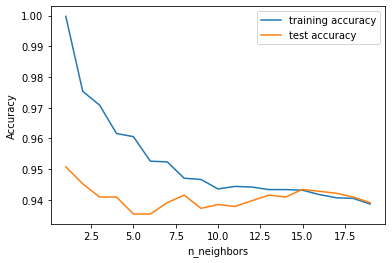

In [24]:
# KNN for Classifier
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

#Print accuracy rounded to two digits to the right of decimal
print(knn.score(X_test, y_test))

y_pred = knn.predict(X_test) # y_pred includes your predictions

0.9433846153846154


In [28]:
#import cross validation functions from sk learn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold
import numpy as np
# Set up function parameters for diff't cross validation strategies
kfold = KFold(n_splits=15)

from statistics import mean 

print("KFold:\n{}".format(
    mean(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=kfold))))

KFold:
0.9404792655903766


### 2.2 B
Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? 

##### Answer: Logistic Regression and Penalized Logistic Regression have no significant difference, the result is pretty close. However, KNN for Classification is very different. Logistic Regression and Penalized Logistic Regression have result around 0.98. On the other hand, KNN Classification has the result of 0.94

### 2.2 C
How does scaling the data with StandardScaler influence the results?

#### Logistic Regression Standard Scaler

In [29]:
## Logistic Regression with StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
Log_scaled = LogisticRegression(C=1, penalty='none', max_iter=6000).fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
Log_scaled.score(X_test_scaled, y_test)

print("Training set score: {:.5f}".format(Log_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(Log_scaled.score(X_test_scaled, y_test)))
print("lasso.coef_: {}".format(Log_scaled.coef_))

Training set score: 0.99384
Test set score: 0.99385
lasso.coef_: [[-0.18950295  1.18500028 -0.41298895 -4.59964295  0.92261776  1.13409008
  -3.11854172  4.78515188  0.0491162   0.52046971  1.63193485  0.36934591]]


#### Penalized Logistic Regression Standard Scaler

In [30]:
## Logistic Regression with StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
Log_pen_scaled = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter=6000).fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
Log_pen_scaled.score(X_test_scaled, y_test)

print("Training set score: {:.5f}".format(Log_pen_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(Log_pen_scaled.score(X_test_scaled, y_test)))
print("lasso.coef_: {}".format(Log_pen_scaled.coef_))

Training set score: 0.99384
Test set score: 0.99446
lasso.coef_: [[ 0.          1.16845624 -0.3620045  -3.81858656  0.89567046  0.90773538
  -2.92504519  4.15201298  0.17270393  0.53620457  1.33243912  0.34696751]]


#### KNN for classification

In [32]:
# KNN for regression using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
KNNClassifier_scaled = KNeighborsClassifier(n_neighbors=15).fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test)
KNNClassifier_scaled.score(X_test_scaled, y_test)

print("Training set score: {:.5f}".format(KNNClassifier_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.5f}".format(KNNClassifier_scaled.score(X_test_scaled, y_test)))

Training set score: 0.99282
Test set score: 0.99323


### 2.2 C Answer
How does scaling the data with StandardScaler influence the results?
##### Answer: StandardScaler increase the results. It increases because preprocessing are rescaling the feature so all of them are approximately in the same scale.

## 2.3 
Tune the parameters where possible using GridSearchCV. Do the results improve?

#### Logistic Regression

In [33]:
from sklearn.model_selection import GridSearchCV

#create dictionary data object with keys equal to parameter name 'n_neighbors' 
#for knn model and values equal to range of k values to create models for

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(LogisticRegression(penalty='none', max_iter=10000), param_grid=param_grid, cv=5)

#use meta model methods to fit score and predict model:
grid.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rif

best mean cross-validation score: 0.989
best parameters: {'C': 0.001}
test-set score: 0.994


#### Penalized Logistic Regression

In [34]:
from sklearn.model_selection import GridSearchCV

#create dictionary data object with keys equal to parameter name 'n_neighbors' 
#for knn model and values equal to range of k values to create models for

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]} #np.arange creates sequence of numbers for each k value

grid_pen = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000), param_grid=param_grid, cv=5)

#use meta model methods to fit score and predict model:
grid_pen.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_pen.best_score_))
print("best parameters: {}".format(grid_pen.best_params_))
print("test-set score: {:.3f}".format(grid_pen.score(X_test, y_test)))

best mean cross-validation score: 0.988
best parameters: {'C': 10}
test-set score: 0.989


#### KNN for Classification

In [35]:
from sklearn.model_selection import GridSearchCV
import numpy as np

#create dictionary data object with keys equal to parameter name 'n_neighbors' 
#for knn model and values equal to range of k values to create models for

param_grid = {'n_neighbors': np.arange(1, 20)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

#use meta model methods to fit score and predict model:
grid.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.944
best parameters: {'n_neighbors': 2}
test-set score: 0.945


## 2.3 Answer 
Tune the parameters where possible using GridSearchCV. Do the results improve?
##### Answer: The result improve for logistic regression. On the other hand, it is slighlt reduced for penalized logistic regression and KNN classification. However, the reduction is very small and could be neglected.

## 2.4
Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

### Logistic Regression

#### Logistic Regression with Stratified k-fold and kfold with shuffling

In [45]:
#import cross validation functions from sk learn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

# Set up function parameters for diff't cross validation strategies
skfold = StratifiedKFold(n_splits=5, shuffle=False)
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
kfold_2 = KFold(n_splits=5, shuffle=False)
kfold_3 = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_logregskfold = GridSearchCV(LogisticRegression(penalty='none', max_iter=10000), param_grid=param_grid, cv=skfold)
grid_logregkfold = GridSearchCV(LogisticRegression(penalty='none', max_iter=10000), param_grid=param_grid, cv=kfold)
grid_logregkfold_2 = GridSearchCV(LogisticRegression(penalty='none', max_iter=10000), param_grid=param_grid, cv=kfold_2)
grid_logregkfold_3 = GridSearchCV(LogisticRegression(penalty='none', max_iter=10000), param_grid=param_grid, cv=kfold_3)

#use meta model methods to fit score and predict model:
grid_logregskfold.fit(X_train, y_train)
grid_logregkfold.fit(X_train, y_train)
grid_logregkfold_2.fit(X_train, y_train)
grid_logregkfold_3.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score Stratified K-fold: {:.3f}".format(grid_logregskfold.best_score_))
print("best mean cross-validation score for K-fold with shuffling: {:.3f}".format(grid_logregkfold.best_score_))
print("best mean cross-validation score for K-fold without shuffling: {:.3f}".format(grid_logregkfold_2.best_score_))
print("best mean cross-validation score for K-fold with shuffling and changing the random state: {:.3f}".format(grid_logregkfold_3.best_score_))
print("------------------------------------------------------------------------------")
print("best parameters Stratified K-fold: {}".format(grid_logregskfold.best_params_))
print("best parameters for K-fold with shuffling: {}".format(grid_logregkfold.best_params_))
print("best parameters for K-fold without shuffling: {}".format(grid_logregkfold_2.best_params_))
print("best parameters for K-fold with shuffling and changing the random state: {}".format(grid_logregkfold_3.best_params_))
print("------------------------------------------------------------------------------")
print("test-set score Stratified K-fold: {:.3f}".format(grid_logregskfold.score(X_test, y_test)))
print("test-set score for K-fold with shuffling: {:.3f}".format(grid_logregkfold.score(X_test, y_test)))
print("test-set score for K-fold without shuffling: {:.3f}".format(grid_logregkfold_2.score(X_test, y_test)))
print("test-set score for K-fold with shuffling and changing the random state: {:.3f}".format(grid_logregkfold_3.score(X_test, y_test)))

/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rifqimfebrian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/rif

best mean cross-validation score Stratified K-fold: 0.989
best mean cross-validation score for K-fold with shuffling: 0.989
best mean cross-validation score for K-fold without shuffling: 0.991
best mean cross-validation score for K-fold with shuffling and changing the random state: 0.989
------------------------------------------------------------------------------
best parameters Stratified K-fold: {'C': 0.001}
best parameters for K-fold with shuffling: {'C': 0.001}
best parameters for K-fold without shuffling: {'C': 0.001}
best parameters for K-fold with shuffling and changing the random state: {'C': 0.001}
------------------------------------------------------------------------------
test-set score Stratified K-fold: 0.994
test-set score for K-fold with shuffling: 0.994
test-set score for K-fold without shuffling: 0.994
test-set score for K-fold with shuffling and changing the random state: 0.994


#### Penalized Logistic Regression with Stratified k-fold and k-fold with shuffling

In [44]:
#import cross validation functions from sk learn

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

# Set up function parameters for diff't cross validation strategies
skfold = StratifiedKFold(n_splits=5, shuffle=False)
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
kfold_2 = KFold(n_splits=5, shuffle=False)
kfold_3 = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_logregskfold_pen = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000), param_grid=param_grid, cv=skfold)
grid_logregkfold_pen = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000), param_grid=param_grid, cv=kfold)
grid_logregkfold_pen_2 = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000), param_grid=param_grid, cv=kfold_2)
grid_logregkfold_pen_3 = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000), param_grid=param_grid, cv=kfold_3)

#use meta model methods to fit score and predict model:
grid_logregskfold_pen.fit(X_train, y_train)
grid_logregkfold_pen.fit(X_train, y_train)
grid_logregkfold_pen_2.fit(X_train, y_train)
grid_logregkfold_pen_3.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score for Stratified K-fold: {:.3f}".format(grid_logregskfold_pen.best_score_))
print("best mean cross-validation score for K-fold with shuffling: {:.3f}".format(grid_logregkfold_pen.best_score_))
print("best mean cross-validation score for K-fold without shuffling: {:.3f}".format(grid_logregkfold_pen_2.best_score_))
print("best mean cross-validation score for K-fold with shuffling and changing the random state: {:.3f}".format(grid_logregkfold_pen_3.best_score_))
print("------------------------------------------------------------------------------")
print("best parameters for Stratified K-fold: {}".format(grid_logregskfold_pen.best_params_))
print("best parameters for K-fold with shuffling: {}".format(grid_logregkfold_pen.best_params_))
print("best parameters for K-fold without shuffling: {}".format(grid_logregkfold_pen_2.best_params_))
print("best parameters for K-fold with shuffling and changing the random state: {}".format(grid_logregkfold_pen_3.best_params_))
print("------------------------------------------------------------------------------")
print("test-set score for Stratified K-fold: {:.3f}".format(grid_logregskfold_pen.score(X_test, y_test)))
print("test-set score for K-fold with shuffling: {:.3f}".format(grid_logregkfold_pen.score(X_test, y_test)))
print("test-set score for K-fold without shuffling: {:.3f}".format(grid_logregkfold_pen_2.score(X_test, y_test)))
print("test-set score for K-fold with shuffling and changing the random state: {:.3f}".format(grid_logregkfold_pen_3.score(X_test, y_test)))

best mean cross-validation score for Stratified K-fold: 0.988
best mean cross-validation score for K-fold with shuffling: 0.988
best mean cross-validation score for K-fold without shuffling: 0.988
best mean cross-validation score for K-fold with shuffling and changing the random state: 0.988
------------------------------------------------------------------------------
best parameters for Stratified K-fold: {'C': 10}
best parameters for K-fold with shuffling: {'C': 100}
best parameters for K-fold without shuffling: {'C': 100}
best parameters for K-fold with shuffling and changing the random state: {'C': 100}
------------------------------------------------------------------------------
test-set score for Stratified K-fold: 0.988
test-set score for K-fold with shuffling: 0.988
test-set score for K-fold without shuffling: 0.988
test-set score for K-fold with shuffling and changing the random state: 0.988


### KNN Classification with Stratified k-fold and k-fold with shuffling, no-shuffling, and random

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

# Set up function parameters for diff't cross validation strategies
skfold = StratifiedKFold(n_splits=5, shuffle=False)
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
kfold_2 = KFold(n_splits=5, shuffle=False)
kfold_3 = KFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {'n_neighbors': np.arange(1, 25)} #np.arange creates sequence of numbers for each k value

grid_skfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=skfold)
grid_kfold = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold)
grid_kfold_2 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold_2)
grid_kfold_3 = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=kfold_3)

#use meta model methods to fit score and predict model:
grid_skfold.fit(X_train, y_train)
grid_kfold.fit(X_train, y_train)
grid_kfold_2.fit(X_train, y_train)
grid_kfold_3.fit(X_train, y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score for Stratified K-fold: {:.3f}".format(grid_skfold.best_score_))
print("best mean cross-validation score for K-fold with shuffling: {:.3f}".format(grid_kfold.best_score_))
print("best mean cross-validation score for K-fold without shuffling: {:.3f}".format(grid_kfold_2.best_score_))
print("best mean cross-validation score for K-fold with shuffling and changing random state: {:.3f}".format(grid_kfold_3.best_score_))
print("------------------------------------------------------------------------------")
print("best parameters for Stratified K-fold: {}".format(grid_skfold.best_params_))
print("best parameters for K-fold with shuffling: {}".format(grid_kfold.best_params_))
print("best parameters for K-fold without shuffling: {}".format(grid_kfold_2.best_params_))
print("best parameters for K-fold with shuffling and changing random state: {}".format(grid_kfold_3.best_params_))
print("------------------------------------------------------------------------------")
print("test-set score for Stratified K-fold: {:.3f}".format(grid_skfold.score(X_test, y_test)))
print("test-set score for K-fold with shuffling: {:.3f}".format(grid_kfold.score(X_test, y_test)))
print("test-set score for K-fold without shuffling: {:.3f}".format(grid_kfold_2.score(X_test, y_test)))
print("test-set score for K-fold with shuffling and changing random state: {:.3f}".format(grid_kfold_3.score(X_test, y_test)))

best mean cross-validation score for Stratified K-fold: 0.944
best mean cross-validation score for K-fold with shuffling: 0.946
best mean cross-validation score for K-fold without shuffling: 0.943
best mean cross-validation score for K-fold with shuffling and changing random state: 0.945
------------------------------------------------------------------------------
best parameters for Stratified K-fold: {'n_neighbors': 2}
best parameters for K-fold with shuffling: {'n_neighbors': 1}
best parameters for K-fold without shuffling: {'n_neighbors': 1}
best parameters for K-fold with shuffling and changing random state: {'n_neighbors': 1}
------------------------------------------------------------------------------
test-set score for Stratified K-fold: 0.945
test-set score for K-fold with shuffling: 0.951
test-set score for K-fold without shuffling: 0.951
test-set score for K-fold with shuffling and changing random state: 0.951


### 2.4 A
Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change?

##### Answer: A change in cross-validation strategy from 'stratitfied k-fold' to 'kfold with shuffling' is changing the parameter of penalized logistic regression and KNN Classification. However, it remains the same for logistic regression.

### 2.4 B
Do they change if you change the random seed of the shuffling?

##### Answer: For all models (logistic regression, penalized logistic regression, and KNN classification), There are a slight difference between the mean score. However, the parameter and test-set score remain the same.

### 2.4 C
Or if you change the random state of the split into training and test data?

##### Answer: Some of the model had a very slight change in mean cross-validation score. However, the test-set score and the parameters remain the same.

## 2.5
Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data

##### Answer: I will choose Logistic Regression compared to Penalized Logistic Regression because Logistic Regression has higher accuracy.